In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
import datetime as DT

import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

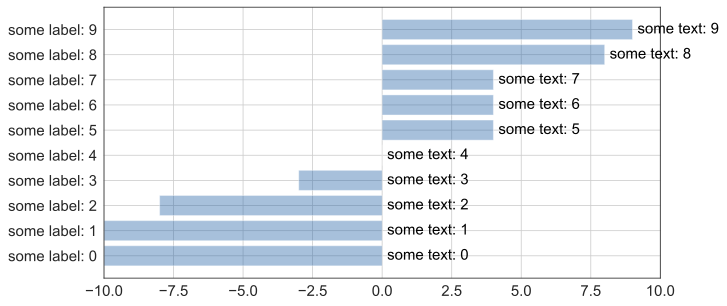

In [2]:
# Сигнатура функции и пример вывода:

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    
    #plt.figure(figsize=figsize)
    fig, ax = plt.subplots()
    fig.set_figwidth(figsize[0])
    fig.set_figheight(figsize[1])

    y_pos = np.arange(len(yticks_labels))
    rects1 = ax.barh( y_pos, bars_length,  color = '#2563A5', tick_label = yticks_labels, alpha=0.4)
    ax.set_xlim(-10,10)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

    i = 0
    for rect in rects1:
        width = int(rect.get_width())
        if width > 0:
            xloc = 5
            clr = 'black'
            align = 'left'
        else:
            xloc = 5
            clr = 'black'
            align = 'left'
            width = 0

        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate(
            labels[i], xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment= align, verticalalignment='center',
            color=clr, clip_on=False, size = 15)
        i+= 1
        
    plt.grid(True)
    plt.show()
    
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 5)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

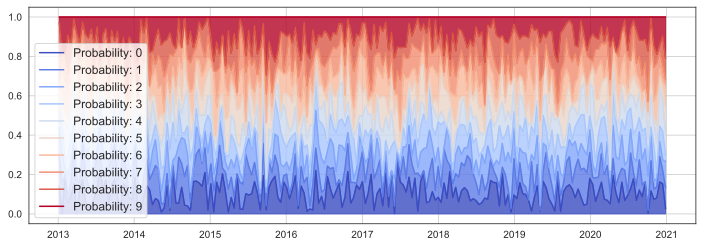

In [3]:
# Сигнатура функции и пример вывода:

def plot_time_probabilities(probabilities_in_time, figsize):
    
    num = len(probabilities_in_time.columns)
   
    #cm = plt.get_cmap('jet')
    cmap = plt.cm.coolwarm(np.linspace(0, 1, num))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_figwidth(figsize[0])
    fig.set_figheight(figsize[1])
    
    
    for i in range(num):
        lines = ax.plot(probabilities_in_time.loc[:, 0:i].sum(axis =1), label='Probability: {}'.format(i))
        lines[0].set_color(cmap[i])
        
        ax.fill_between(probabilities_in_time.index, probabilities_in_time.loc[:, 0:i-1].sum(axis =1), 
                         probabilities_in_time.loc[:, 0:i].sum(axis =1), 
                         color = cmap[i],
                         alpha=0.8)
            
    plt.legend(prop={'size': 12}, loc = 3)
    plt.grid(True)
    #plt.xlim('2014-01', '2014-10') 
    plt.show()
    return

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (12, 4)

plot_time_probabilities(probabilities_in_time, figsize)


### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

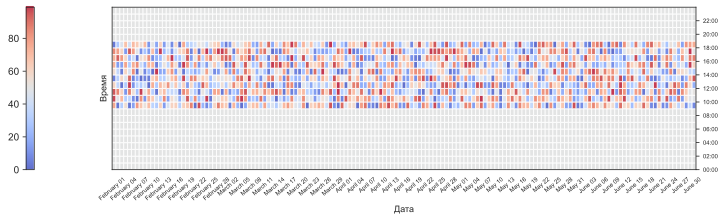

In [4]:
# Сигнатура функции и пример вывода:

def plot_intraday_ts(intraday_ts, figsize):
    
    intraday_ts = intraday_ts[:(len(intraday_ts)//24)*24]
    a = np.array(intraday_ts.values).reshape(-1, 24)
    intraday_ts = pd.DataFrame(a, index = np.unique(intraday_ts.index.date), columns = np.unique(intraday_ts.index.time))
    intraday_ts = intraday_ts.T
    intraday_ts = intraday_ts.fillna(intraday_ts.mean().mean())
    num = len(intraday_ts)
    cm = plt.cm.coolwarm
    #cm = plt.get_cmap('seismic')
    fig, ax = plt.subplots()
    fig.set_figwidth(figsize[0])
    fig.set_figheight(figsize[1])
    
    
    #ax.set_xticklabels(intraday_ts.columns, rotate = 40)
    
    
    abbr = ax.pcolormesh(intraday_ts, edgecolors = 'white', cmap = cm, alpha = 0.8)


    #ax.grid(True)
    #ax.grid(which='major', color = '#999999')
    #ax.minorticks_on()
    #ax.grid(which='minor', color = '#BBBBBB', linestyle = 'solid')
    plt.ylabel('Время', fontsize=9)
    plt.xlabel('Дата', fontsize=9)
    
    #cb = (col_bar._values)
    ax.set_xticks(range(0, len(intraday_ts.columns), 3))
    ax.set_xticklabels([intraday_ts.columns[i].strftime('%B %d') for i in range(0,len(intraday_ts.columns), 3)], rotation=40, fontsize = 6)
    ax.set_yticks(range(0, len(intraday_ts.index), 2))
    ax.set_yticklabels([intraday_ts.index[i].strftime('%H:%M') for i in range(0, len(intraday_ts.index), 2)], fontsize = 6 )
    ax.yaxis.set_ticks_position('right')
    
    col_bar = plt.colorbar(abbr, location = 'left') 
    
    plt.show()

    return

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (14, 3)


plot_intraday_ts(intraday_ts, figsize)